In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv("Desktop/Merc_Greener_Manufacturing/train.csv")
test = pd.read_csv("Desktop/Merc_Greener_Manufacturing/test.csv")

In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.shape

(4209, 378)

In [7]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5,1,'y distribution')

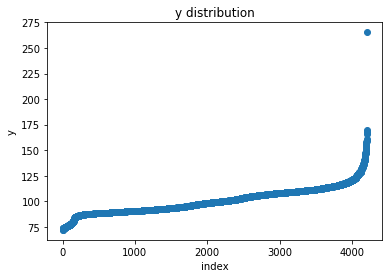

In [9]:
#plotting the y values with respect to their index
plt.scatter( range(train.shape[0]) , np.sort(train["y"].values) )
plt.xlabel("index")
plt.ylabel("y")
plt.title("y distribution")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Y value distribution count')

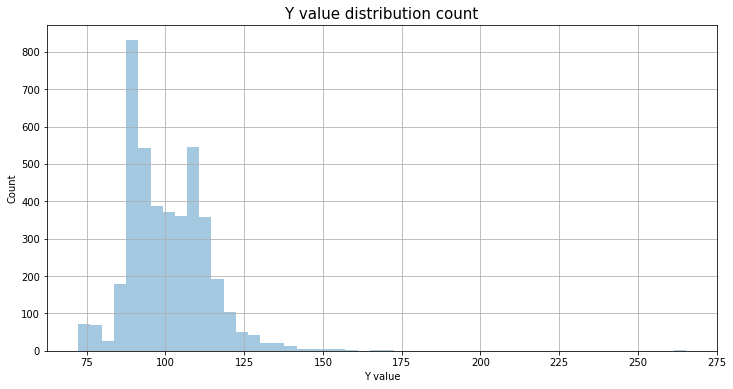

In [10]:
#our goal is to create a model to predict the y values.
#Let us first understand the distribution of the y values
plt.figure(figsize=(12,6))
ax = sns.distplot(train.y.values, bins=50, kde= False).grid(True)
plt.xlabel("Y value")
plt.ylabel("Count")
plt.title("Y value distribution count", fontsize=15)


In [11]:
dtype_df= train.dtypes.reset_index()
dtype_df.columns = ["Count", "type"]
dtype_df.groupby("type").count()


,Count
type,
int64,369
float64,1
object,8


In [12]:
#restructuing the data frame in accordance with increasing y values
train = train.sort_values(by=["ID"])
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#checking for any missing values
#Creating a new datafram na_count where we reset the indices so we can relabel and then sort
na_count = train.isna().sum(axis=0).reset_index()
#relabeling the indices 
na_count.columns= ["Column-name", "Count"]
#only those rows with "Count" >0 will be kept in na_count
na_count = na_count.loc[na_count["Count"]>0]
na_count

#therefore, there are no missing values in the training data set

,Column-name,Count


In [14]:
#seeing the distribution of unique values in each integer column
dict_unique_values= {}
for col in train:
    if col not in ['ID','y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
        #We need to convert to a string using str() because if we dont we will not be able to perform our functions on it
        unique_value = str(np.sort(train[col].unique()).tolist())
        #Currently the dictionary has no key unique_value so when we apply the get function we will get none. Instead we set it to get an empty array
        dict_unique_values.setdefault(unique_value, [])
        dict_unique_values[unique_value].append(col)



In [15]:
#printing the dictionary with unique_value
for unique_values, col in dict_unique_values.items():
    print("values:", unique_values)
    print(col)
#The columns that have only value 0 will not be considered when building the model.

values: [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X150'

Text(0.5,1,'Distribution of y wrt X0')

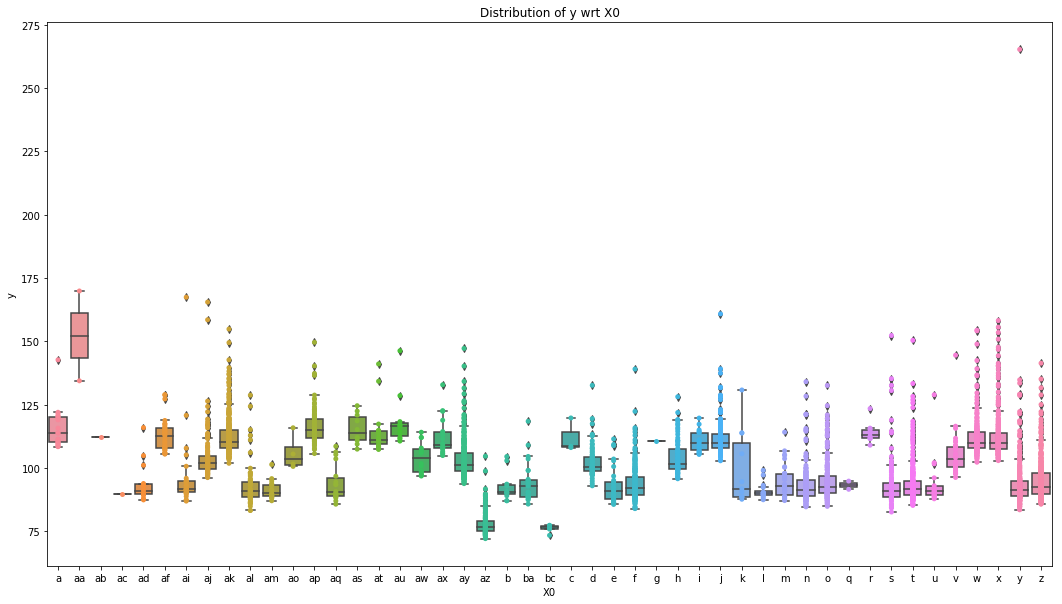

In [16]:
#exploring the distribution of the y variable wrt the other non-binary columns
unique_items = np.sort(train["X0"].unique())
plt.figure(figsize=(18,10))
sns.boxplot(x="X0", y="y", data=train, order=unique_items)
sns.stripplot(x="X0", y="y", data=train, order= unique_items)
plt.title("Distribution of y wrt X0")

Text(0.5,1,'Distribution of y wrt X1')

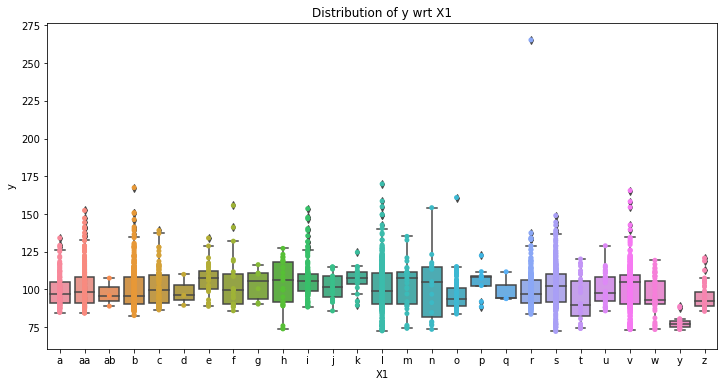

In [17]:
unique_items = np.sort(train["X1"].unique())
plt.figure (figsize=(12,6))
sns.boxplot(x="X1", y="y", data=train, order=unique_items)
sns.stripplot(x="X1", y="y", data= train, order=unique_items)
plt.title("Distribution of y wrt X1")

Text(0.5,1,'Distribution of y wrt X2')

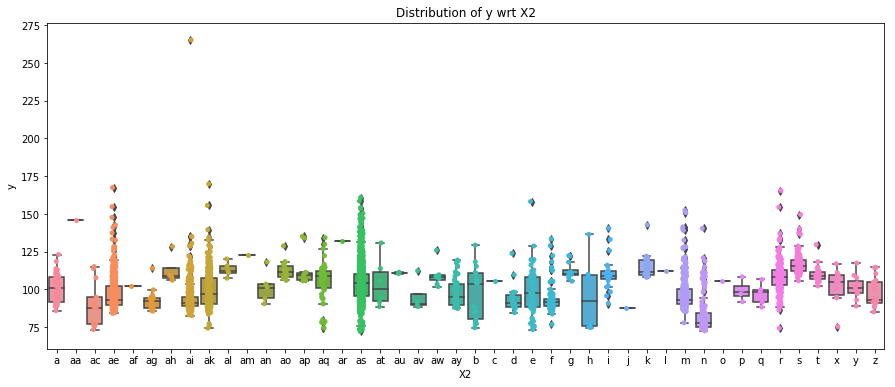

In [18]:
unique_items = np.sort(train["X2"].unique())
plt.figure(figsize=(15,6))
sns.boxplot(x="X2", y="y", data=train, order=unique_items)
sns.stripplot(x="X2", y="y", data= train, order= unique_items, jitter= True)
plt.title("Distribution of y wrt X2")

Text(0.5,1,'Distribution of y wrt to X3')

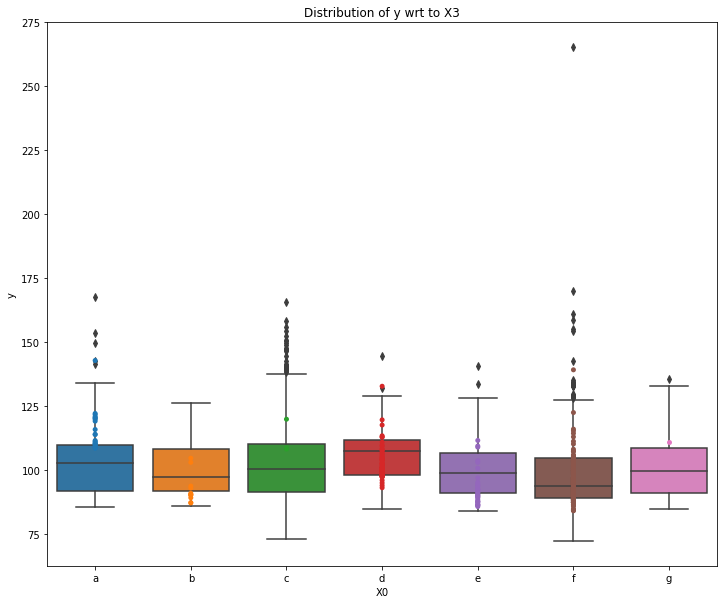

In [19]:
unique_items = np.sort(train["X3"].unique())
plt.figure(figsize=(12,10))
sns.boxplot(x="X3", y="y", data=train, order=unique_items)
sns.stripplot(x="X0", y="y", data=train, order=unique_items)
plt.title("Distribution of y wrt to X3")


['a' 'b' 'c' 'd']


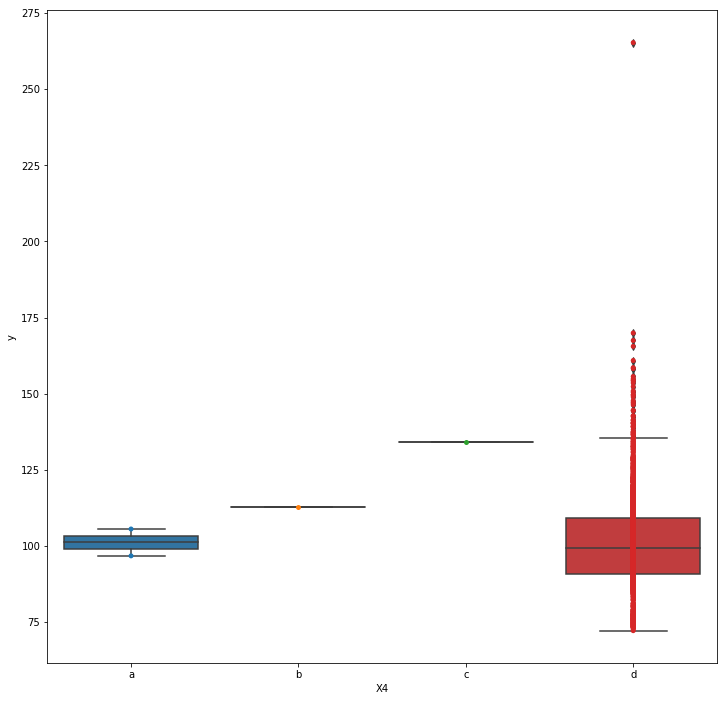

In [20]:
unique_items = np.sort(train.X4.unique())
plt.figure(figsize=(12,12))
sns.boxplot(x="X4", y="y", data=train, order=unique_items)
sns.stripplot(x="X4", y="y", data=train, order=unique_items)
print(unique_items)


['aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'c' 'd' 'f' 'g' 'h' 'i' 'j' 'k'
 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 'u' 'v' 'w' 'x' 'y']


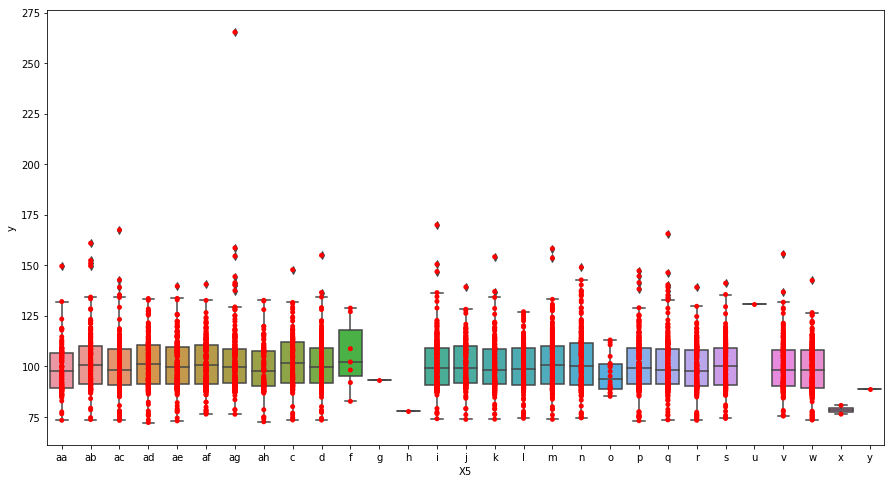

In [21]:
unique_items = np.sort(train.X5.unique())
plt.figure(figsize=(15,8))
sns.boxplot(x="X5", y="y", data=train, order=unique_items)
sns.stripplot(x="X5", y="y", data=train, order=unique_items, color="red")
print(unique_items)



['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l']


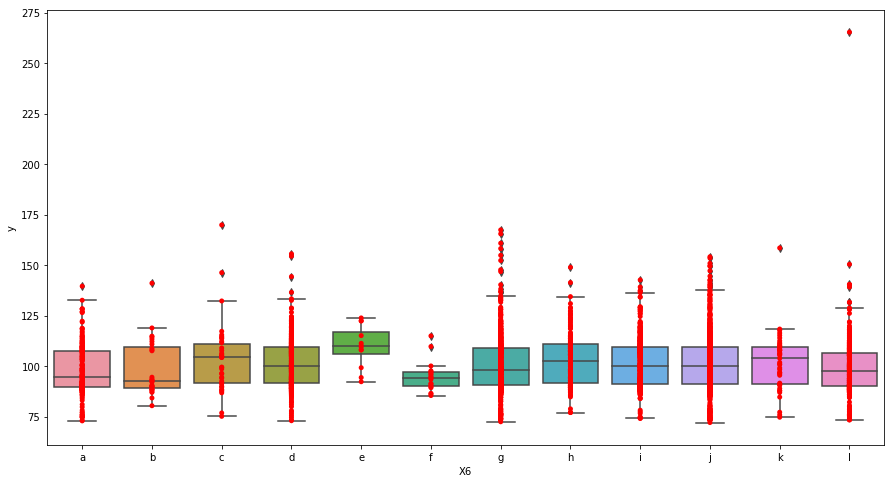

In [22]:
unique_items = np.sort(train.X6.unique())
plt.figure(figsize=(15,8))
sns.boxplot(x="X6", y="y", data=train, order=unique_items)
sns.stripplot(x="X6", y="y", data=train, order=unique_items, color="red")
print(unique_items)



['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y']


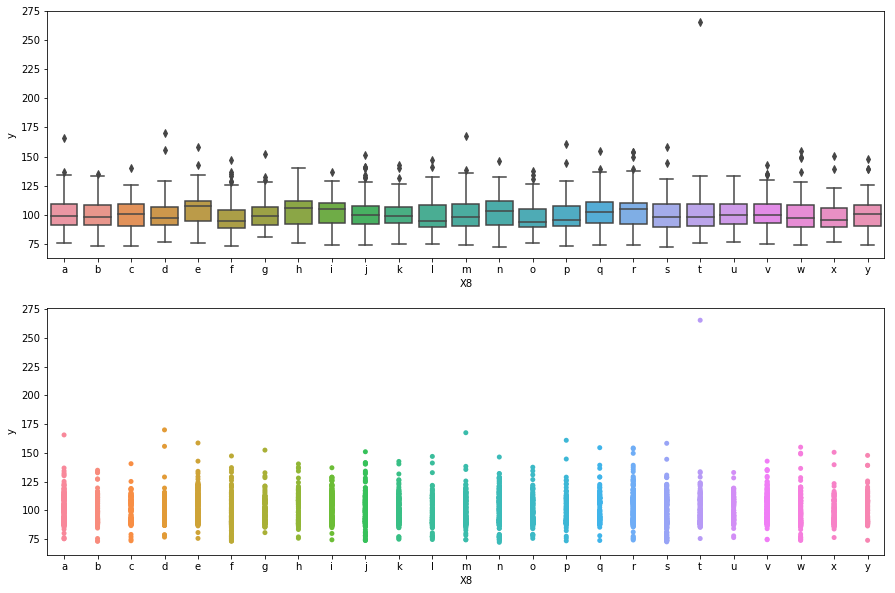

In [23]:
unique_items = np.sort(train.X8.unique())
f, axes = plt.subplots(2,1, figsize= (15,10) )
sns.boxplot(x="X8", y="y", data=train, order=unique_items, ax=axes[0])
sns.stripplot(x="X8", y="y", data=train, order=unique_items, ax=axes[1])
print(unique_items)



Text(0.5,1,'Distribution of binary values per column')

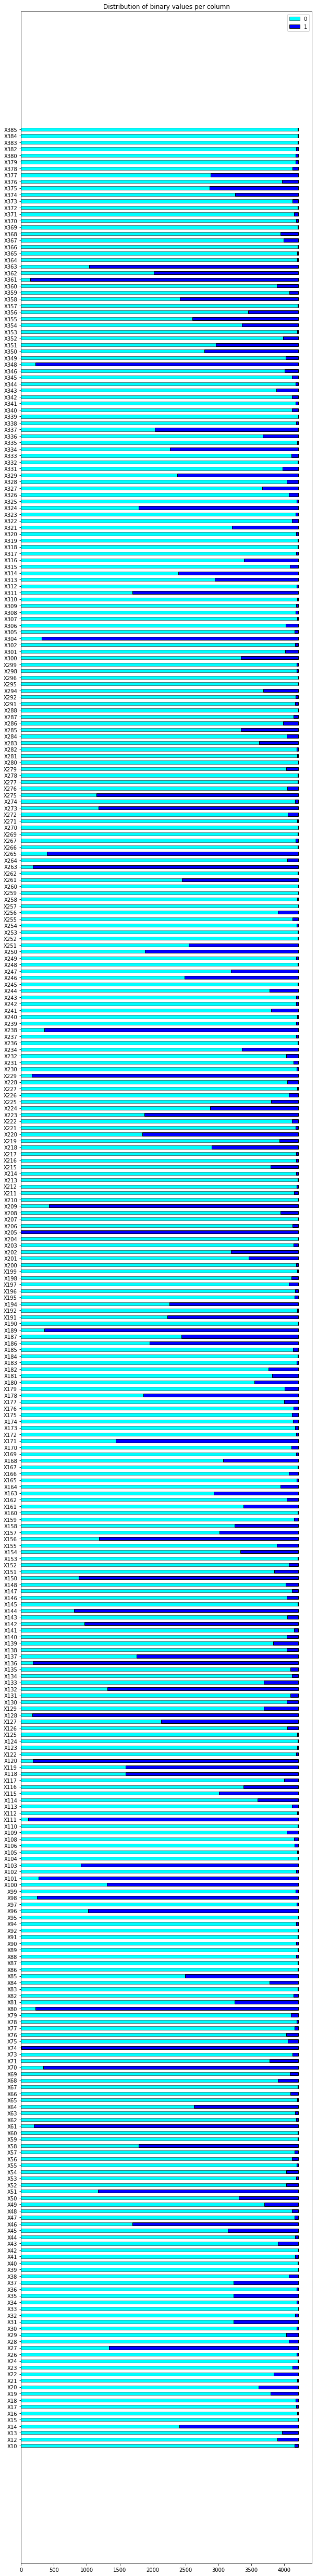

In [24]:
#Determining the distribution of the binary values per int column
zero_list = []
one_list = []
columns_list = dict_unique_values['[0, 1]']
for col in columns_list:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

N = len(columns_list)
x = np.arange(N)

plt.figure(figsize=(10,90))
plot_1 = plt.barh(columns_list, zero_list,0.5, linewidth= 0.5, color="cyan", edgecolor="black")
plot_2 = plt.barh(columns_list, one_list,0.5, left = zero_list, color = "blue", edgecolor = "black")

plt.legend((plot_1, plot_2), ("0","1"))
plt.title("Distribution of binary values per column")

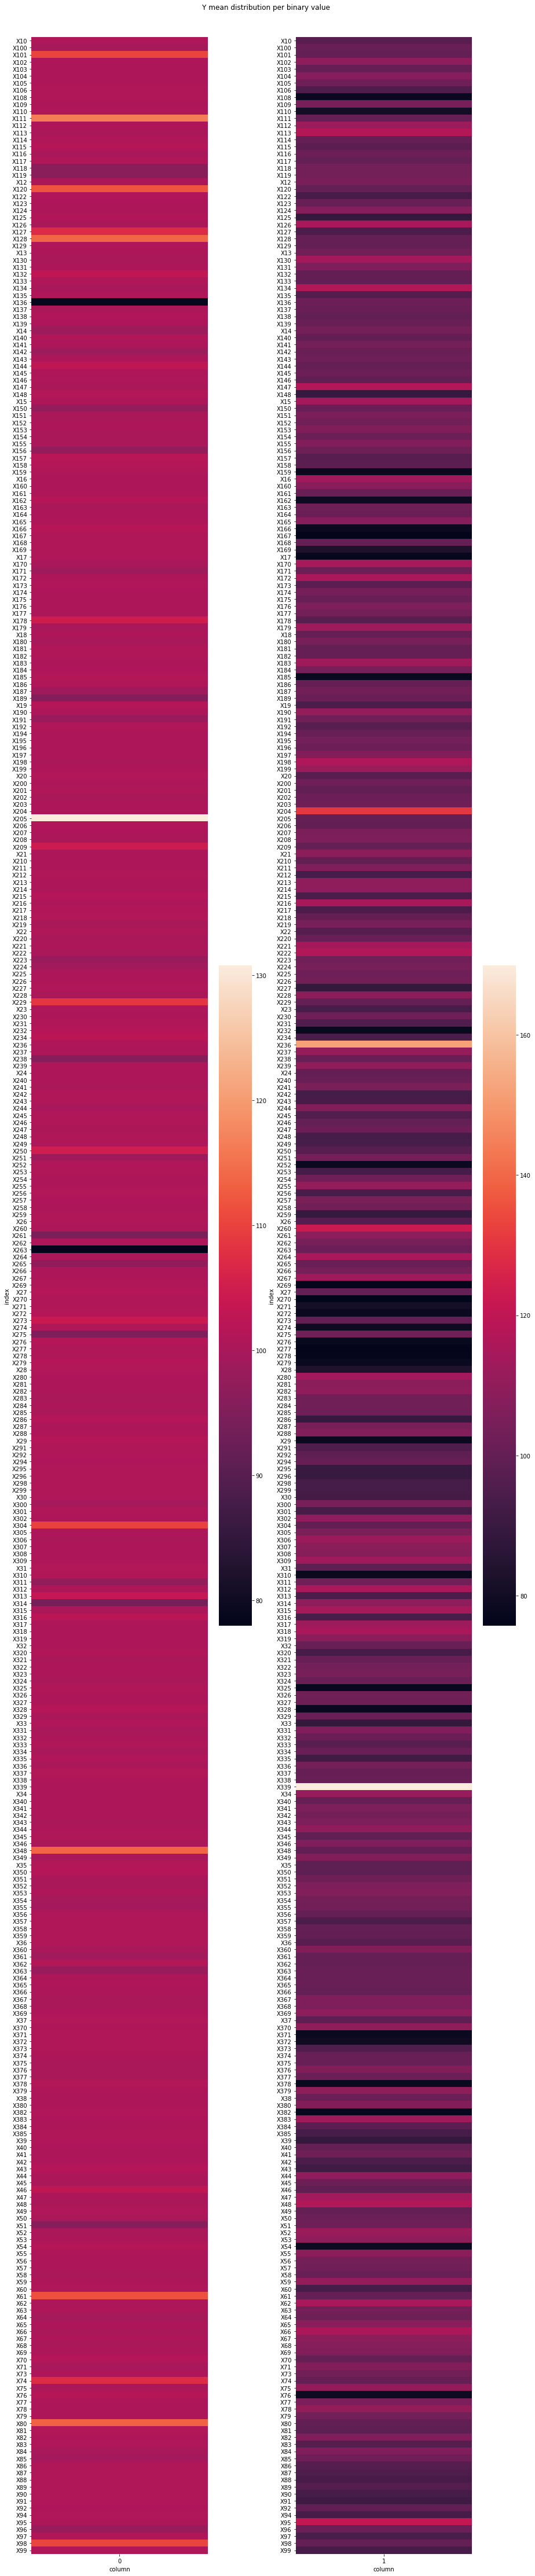

In [25]:
#y mean distribution based on the binary values
zero_mean_y = []
one_mean_y = []
for col in columns_list:
    zero_mean_y.append(train.loc[train[col]==0].y.mean())
    one_mean_y.append(train.loc[train[col]==1].y.mean())

zero_mean_df = pd.DataFrame({"index":columns_list, "y_mean":zero_mean_y, "column":0}) 
#pivot allows us to re-arrange our dataframe so we have new indices, columns and values
zero_mean_df = zero_mean_df.pivot("index", "column","y_mean")

one_mean_df = pd.DataFrame({"index": columns_list, "y_mean": one_mean_y, "column":1})
one_mean_df = one_mean_df.pivot("index", "column", "y_mean")

f, axes= plt.subplots(1,2, figsize=(15, 80))
sns.heatmap(zero_mean_df, ax=axes[0])
f.suptitle("Y mean distribution per binary value", y=0.89)
sns.heatmap(one_mean_df, ax=axes[1])


In [26]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

#Building our stacking model
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0
NFOLD = 5
kf = KFold(ntrain, n_folds = NFOLD, random_state = SEED)

#creating a class to ease the creation of the different predictive models
class sklearnHelper (object):
    def __init__(self, clf, seed = 0, params = None):
        #params["random_state"] = seed
        self.clf = clf(**params)
        
    def train (self, train_X, train_Y):
        self.clf.fit(train_X, train_Y)
        
    def predict (self, X):
        return self.clf.predict(X)
    
    def fit (self, X, Y):
        return self.clf.fit(X,Y)
    
    def feature_importances_(self,X,Y):
        importance = self.clf.fit(X,Y).feature_importances_
        return importance

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
#to account for overfitting we create multiple folds to train the different levels of the model 
def get_oof(clf, train_x, train_y, test_x):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    #this creates the number of folds for the next level of stacking
    oof_test_skf = np.empty((NFOLD, ntest))    

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = train_x.iloc[train_index]
        y_tr = train_y.iloc[train_index]
        x_te = train_x.iloc[test_index]
       
        clf.train(x_tr, y_tr)
       
        #our next train model is the size of our first test model
        oof_train[test_index] = clf.predict(x_te)
        #i is the number of times it iterates through kf = 5 aka the number of folds
        #we set oof_test_skf to be the predictions for the actual x_test data
        oof_test_skf[i,:] = clf.predict(test_x)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [28]:
#Parameters for the different models
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0,
    "random_state":0
}
#SVC parameters
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025,
    "random_state":0
    }

#Decision tree parameters
dt_params = {
    'max_depth': 6,
    'min_samples_leaf': 2,
    #"criterion" : 'gini'
    "random_state":0
    }

#Linear regression parameters
lr_params = {
    "fit_intercept": True,
    "normalize": False,
    
    }

In [29]:
#4 objects that represent our 4 models
rf = sklearnHelper(clf = RandomForestRegressor, seed=SEED, params=rf_params)
svc = sklearnHelper(clf = SVC, seed=SEED, params = svc_params)
dt = sklearnHelper (clf = DecisionTreeRegressor, seed= SEED, params = dt_params)
lr = sklearnHelper (clf = LinearRegression, seed= SEED, params = lr_params)

In [30]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
        
        lbl2 = preprocessing.LabelEncoder()
        lbl2.fit(list(test[f].values))
        test[f] = lbl2.transform(list(test[f].values))
        
#training and testing sets
train_y = train.y
train_x = train.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis = 1) # columns that have all 0 values
train_x = train_x.drop(["y","ID"], axis =1)
test_x = test.drop(["ID",'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1)



In [31]:
rf_oof_train, rf_oof_test = get_oof(rf, train_x, train_y, test_x)
#svc_oot_train, svc_oot_test = get_oof(svc, train_x, train_y, test_x)
dt_oof_train, dt_oof_test = get_oof(dt, train_x, train_y, test_x)
lr_oof_train, lr_oof_test = get_oof(lr, train_x, train_y, test_x)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [32]:
rf_feature = pd.DataFrame(rf.feature_importances_(train_x,train_y), index = train_x.columns, columns = ['importance']).sort_values('importance', ascending=False)

dt_feature = pd.DataFrame(dt.feature_importances_(train_x,train_y), index = train_x.columns, columns = ['importance']).sort_values('importance', ascending=False)

print(rf_feature.head(10))
print(dt_feature.head(10))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


      importance
X314    0.119788
X127    0.104398
X261    0.101774
X313    0.034566
X29     0.028221
X279    0.024657
X232    0.024630
X316    0.024279
X0      0.023902
X263    0.023875
      importance
X314    0.612542
X315    0.134614
X136    0.114786
X118    0.085955
X5      0.010145
X47     0.007738
X2      0.005885
X311    0.004386
X8      0.002923
X220    0.002831


In [33]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#Plotting a scatter plot of the importances
trace = go.Scatter(
    y = rf_feature["importance"].values[0:10],
    x = rf_feature.index[0:10],
    mode = 'markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = rf_feature["importance"].values[0:10],
        colorscale='Portland',
        showscale=True
    ),
    text = rf_feature.index[0:10]
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = "Random Forest Feature Importances",
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    hovermode = 'closest',
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_merc')


In [34]:
#scatter plot for decision tree importances
trace = go.Scatter(
    y = dt_feature.importance.values[0:10],
    x = dt_feature.index[0:10],
    mode = 'markers',
    marker = dict(
    sizemode = 'diameter',
        sizeref=1,
        size=25,
        color=dt_feature.importance.values[0:10],
        colorscale = "Portland",
        showscale = True
    ),
    text = dt_feature.index[0:10]
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Decision Tree feature importances',
    hovermode = 'closest',
    showlegend = False,
    yaxis_title = "Feature Importance",
    xaxis_title = "Feature"
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter_merc')

In [35]:
#Combining our feature importances into a single DataFrame

In [36]:
rf_feature, dt_feature
rf_feature = pd.DataFrame(rf.feature_importances_(train_x,train_y), index = train_x.columns, columns = ['importance'])
dt_feature = pd.DataFrame(dt.feature_importances_(train_x,train_y), index = train_x.columns, columns = ['importance'])

feature = {"rf_importances": rf.feature_importances_(train_x,train_y),"dt_importances": dt.feature_importances_(train_x,train_y)}

feature_df = pd.DataFrame(feature, index = train_x.columns)

feature_df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning:

Warm-start fitting without increasing n_estimators does not fit new trees.

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning:

Warm-start fitting without increasing n_estimators does not fit new trees.



,rf_importances,dt_importances
X0,0.023902,0.000000
X1,0.002035,0.001668
X2,0.012599,0.005885
X3,0.002110,0.000181
X4,0.000008,0.000000


In [37]:
#calculating the mean of each variable
feature_df['mean'] = feature_df.mean(axis=1)
feature_df.head()

,rf_importances,dt_importances,mean
X0,0.023902,0.000000,0.011951
X1,0.002035,0.001668,0.001851
X2,0.012599,0.005885,0.009242
X3,0.002110,0.000181,0.001146
X4,0.000008,0.000000,0.000004


In [38]:
#plotting out the mean importances
trace = go.Bar(
    y = feature_df['mean'].values,
    x = feature_df.index,
    marker = dict(
        color = feature_df['mean'].values,
        colorscale = 'Portland'
    ),
    text = feature_df.index
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Mean feature importances',
    hovermode = 'closest',
    showlegend = False,
    yaxis_title = "Feature Importance",
    xaxis_title = "Feature"
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'bar_merc')

In [39]:
#plotting out the mean importances in descending order
feature_df = feature_df.sort_values('mean', ascending=False)

trace = go.Bar(
    y = (feature_df['mean']).values[:15],
    x = feature_df.index[:15],
    marker = dict(
        color = feature_df['mean'].values[:15],
        colorscale = 'Portland'
    ),
    text = feature_df.index[:15]
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Mean feature importances',
    hovermode = 'closest',
    showlegend = False,
    yaxis_title = "Feature Importance",
    xaxis_title = "Feature"
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'bar_merc')

print(feature_df.head(15))

      rf_importances  dt_importances      mean
X314        0.119788        0.612542  0.366165
X315        0.008121        0.134614  0.071367
X136        0.022304        0.114786  0.068545
X127        0.104398        0.000000  0.052199
X261        0.101774        0.000000  0.050887
X118        0.015014        0.085955  0.050484
X313        0.034566        0.000000  0.017283
X29         0.028221        0.000000  0.014111
X279        0.024657        0.000000  0.012329
X232        0.024630        0.000000  0.012315
X316        0.024279        0.000000  0.012140
X0          0.023902        0.000000  0.011951
X263        0.023875        0.000000  0.011938
X76         0.020981        0.000000  0.010490
X54         0.020210        0.000000  0.010105


In [40]:
#our output from our first level predictions will now be the training data for the next classifier
base_predictions_train = pd.DataFrame({'RandomForest': rf_oof_train.ravel(), 
                                       'DecisionTree': dt_oof_train.ravel(),
                                       'LinearRegression': lr_oof_train.ravel()})
base_predictions_train.head(15)

,RandomForest,DecisionTree,LinearRegression
0,100.863459,92.379662,3.573993e+10
1,96.267999,92.379662,1.082157e+02
2,78.942457,76.166087,6.326257e+01
3,78.149410,76.166087,7.049561e+01
4,78.723205,79.351143,7.325513e+01
5,97.088470,94.723114,9.418335e+01
6,95.977541,94.723114,3.103913e+09
7,97.134503,94.723114,9.571313e+01
8,108.932235,112.687322,1.106482e+02
9,108.581101,112.687322,1.110715e+02


In [41]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [42]:
train_x = np.concatenate((  rf_oof_train, dt_oof_train, lr_oof_train), axis=1)
test_x = np.concatenate((  rf_oof_test, dt_oof_test, lr_oof_test), axis=1)

In [43]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=10000, learning_rate=0.08, gamma=0.8, subsample=0.75,
                           colsample_bytree=1, max_depth=7).fit(train_x, train_y)
predictions = xgb.predict(test_x)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [47]:
ID =test.ID

results_df = pd.DataFrame({"ID": ID, "y": predictions})

results_df.to_csv("Desktop/Merc_Greener_Manufacturing/ensembling_submission_df.csv", index= False, )

In [ ]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
        
        lbl2 = preprocessing.LabelEncoder()
        lbl2.fit(list(test[f].values))
        test[f] = lbl2.transform(list(test[f].values))
        
train_X = train[["X0","X2"]]
train_Y = train ["y"]
test_X = test[["X0","X2"]]

rf_model = RandomForestRegressor(n_estimators = 100, random_state=1 )
rf_model.fit(train_X, train_Y)

